# **Proyecto 2**

In [45]:
# Importando librerías

import sys
import keyword
import operator
from datetime import datetime
import os
import math

import matplotlib.pyplot as plt  #visualization
import seaborn as sb  #visualization

import numpy as np
import pandas as pd

# Esta linea permite que los graficos sean renderizados directamente en nuestro Notebook
%matplotlib inline

# Ejercicio 1
Generar una función y utilizar esta para recodificar la variable “país
de origen” (1, 2, 3) en el dataframe a través de la función apply.

In [46]:
#Leemos el archivo csv y lo almacenamos como DataFrame en una variable para usarlo posteriormente
autos = pd.read_csv('https://raw.githubusercontent.com/Nancy-RS/Data-Analytics/proyecto1/autos.csv')
autos.head(10)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,USA,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0
1,15.0,8,USA,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0
2,18.0,8,USA,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0
3,16.0,8,USA,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0
4,17.0,8,USA,3449,302.0,10.5,ford torino,01/01/1970,140.0
5,15.0,8,USA,4341,429.0,10.0,ford galaxie 500,01/01/1970,198.0
6,14.0,8,USA,4354,454.0,9.0,chevrolet impala,01/01/1970,220.0
7,14.0,8,USA,4312,440.0,8.5,plymouth fury iii,01/01/1970,215.0
8,14.0,8,USA,4425,455.0,10.0,pontiac catalina,01/01/1970,225.0
9,15.0,8,USA,3850,390.0,8.5,amc ambassador dpl,01/01/1970,190.0


In [47]:
#Encuentro los valores únicos de la variable Pais_Origen para saber cómo será la asignación
autos['Pais_Origen'].unique().tolist()

['USA', 'Europe', 'Japan']

In [48]:
Pais_Origen = autos['Pais_Origen'].tolist()

In [49]:
def paises(lista):
    new_code = []
    for pais in lista:
        if pais == 'USA':
            pais_code = pais.replace('USA', '1')
            new_code.append(pais_code)
        elif pais == 'Europe':
            pais_code = pais.replace('Europe', '2')
            new_code.append(pais_code)
        else:
            pais_code = pais.replace('Japan', '3')
            new_code.append(pais_code)
    return new_code

codigo_paises = paises(Pais_Origen)

In [50]:
autos['Pais_Origen'] = codigo_paises
autos

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,01/01/1970,140.0
...,...,...,...,...,...,...,...,...,...
401,27.0,4,1,2790,140.0,15.6,ford mustang gl,01/01/1982,86.0
402,44.0,4,2,2130,97.0,24.6,vw pickup,01/01/1982,52.0
403,32.0,4,1,2295,135.0,11.6,dodge rampage,01/01/1982,84.0
404,28.0,4,1,2625,120.0,18.6,ford ranger,01/01/1982,79.0


# Ejercicio 2
Generar un Notebook Colab con código y resultados, con el
siguiente fichero autos.csv que contiene información de autos de
un periodo de tiempo. Resolver los siguientes:
- Limpieza y tratamiento de las variables (Según corresponda)
- Generar 5 nuevas variables aplicando los siguientes criterios
con las variables numéricas:


1. Log10(var1/var2)
2. Sqrt(var1)*exp(var2)/200
3. Si var 1 &gt; var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1



*   Generar 3 variables cualitativas ordinales a partir de las
variables numéricas con los siguientes criterios:

★ Si es mayor a la “media + 1*desviación estándar” →
Alto 
★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio
★ Si es menor a la “media - 1*desviación estándar” →
Bajo
Nota: Mostrar con las nuevas variables generadas.
Elegir con libertad las variables a trabajar.
- Crear una función que muestre los siguientes gráficos para
las variables numéricas según una variable cualitativa:

❖ Cajas y bigotes
❖ Barras de la media
❖ Histograma con Curva

- Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.





## LIMPIEZA Y TRATAMIENTO

In [51]:
#LIMPIEZA Y TRATAMIENTO

#Visualización del Data frame
autos.head(5)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0
4,17.0,8,1,3449,302.0,10.5,ford torino,01/01/1970,140.0


In [52]:
#variables que contiene el data frame
autos.columns

Index(['Millas_Por_Galon', 'Cilindros', 'Pais_Origen', 'Peso_En_Libras',
       'Desplazamiento', 'Aceleracion', 'Nombre', 'Anyo', 'Caballo_De_Fuerza'],
      dtype='object')

In [53]:
#Vemos el número de filas y el número de columnas que contiene el dataframe
autos.shape

#Podemos observar que hay 9 variables con 406 registros 

(406, 9)

In [54]:
#Podemos de ver que Millas_Por_Galon y Caballo_De_Fuerza tienen registros son nulos
autos.isnull().sum()

Millas_Por_Galon     8
Cilindros            0
Pais_Origen          0
Peso_En_Libras       0
Desplazamiento       0
Aceleracion          0
Nombre               0
Anyo                 0
Caballo_De_Fuerza    6
dtype: int64

In [55]:
#Todas las variables, el tipo y los datos nulos y no nulos que contiene
autos.info()

#la variable Millas_Por_Galon, por ejemplo, contiene (406-398) 8 valores nulos y está registrado como un número decimal float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Millas_Por_Galon   398 non-null    float64
 1   Cilindros          406 non-null    int64  
 2   Pais_Origen        406 non-null    object 
 3   Peso_En_Libras     406 non-null    int64  
 4   Desplazamiento     406 non-null    float64
 5   Aceleracion        406 non-null    float64
 6   Nombre             406 non-null    object 
 7   Anyo               406 non-null    object 
 8   Caballo_De_Fuerza  400 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 28.7+ KB


In [56]:
#Tipo de variables
autos.dtypes

Millas_Por_Galon     float64
Cilindros              int64
Pais_Origen           object
Peso_En_Libras         int64
Desplazamiento       float64
Aceleracion          float64
Nombre                object
Anyo                  object
Caballo_De_Fuerza    float64
dtype: object

In [57]:
#Estadísticas de las columnas numéricas 
autos.describe()

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
count,398.000000,406.000000,406.000000,406.000000,406.000000,400.000000
mean,23.514573,5.475369,2979.413793,194.779557,15.519704,105.082500
std,7.815984,1.712160,847.004328,104.922458,2.803359,38.768779
min,9.000000,3.000000,1613.000000,68.000000,8.000000,46.000000
25%,17.500000,4.000000,2226.500000,105.000000,13.700000,75.750000
50%,23.000000,4.000000,2822.500000,151.000000,15.500000,95.000000
75%,29.000000,8.000000,3618.250000,302.000000,17.175000,130.000000
max,46.600000,8.000000,5140.000000,455.000000,24.800000,230.000000


In [58]:
#Borramos los datos nulos ya que son pocos
autos = autos.dropna()

In [59]:
#Estadísticas de las columnas numéricas después de borrar nulos 
autos.describe()

#Observamos no afectan significativamente a las medidas de tendencia central ni a los cuartiles

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,2977.584184,194.411990,15.541327,104.469388
std,7.805007,1.705783,849.402560,104.644004,2.758864,38.491160
min,9.000000,3.000000,1613.000000,68.000000,8.000000,46.000000
25%,17.000000,4.000000,2225.250000,105.000000,13.775000,75.000000
50%,22.750000,4.000000,2803.500000,151.000000,15.500000,93.500000
75%,29.000000,8.000000,3614.750000,275.750000,17.025000,126.000000
max,46.600000,8.000000,5140.000000,455.000000,24.800000,230.000000


In [60]:
#Quitamos los duplicados 
autos = autos.drop_duplicates()

#Notamos que nos quedamos con la misma cantidad de registros NO nulos, por lo que no habían duplicados  
len(autos)

392



## NUEVAS VARIABLES NUMÉRICAS
* Generar 5 nuevas variables aplicando los siguientes criterios con las variables numéricas:


1.   Log10(var1/var2)
2.   Sqrt(var1)*exp(var2)/200
3. Si var 1 > var 2 → 5, caso contrario 3
4. 1/logn(var1/var2)*100
5. var2**2/var1


In [61]:
#1
autos['ajuste1'] = np.log10(autos['Desplazamiento']/autos['Peso_En_Libras'])
#2
autos['ajuste2'] = np.sqrt(autos['Peso_En_Libras']) * np.exp(autos['Desplazamiento'])/200
#3
autos['ajuste3'] = np.where(autos['Millas_Por_Galon'] > autos['Cilindros'], 5, 3)
#4
autos['ajuste4'] = 1 / np.log2(autos['Millas_Por_Galon']/autos['Aceleracion']) * 100
#5
autos['ajuste5'] = autos['Millas_Por_Galon']**2 /autos['Aceleracion']

In [62]:
#Así queda el nuevo DataFrame con las variables agregadas
autos.head()

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,ajuste1,ajuste2,ajuste3,ajuste4,ajuste5
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0,-1.057426,6.304607e+132,5,170.951129,27.000000
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0,-1.023311,3.060049e+151,5,260.872760,19.565217
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0,-1.033626,3.738022e+137,5,140.747264,29.454545
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0,-1.052800,3.106915e+131,5,240.942084,21.333333
4,17.0,8,1,3449,302.0,10.5,ford torino,01/01/1970,140.0,-1.057686,4.214540e+130,5,143.854793,27.523810


## NUEVAS VARIABLES CUALITATIVAS

*   Generar 3 variables cualitativas ordinales a partir de las
variables numéricas con los siguientes criterios:

★ Si es mayor a la “media + 1*desviación estándar” →
Alto 
★ Si está entre “media - 1*desviación estándar” y
“media + 1*desviación estándar” → Medio
★ Si es menor a la “media - 1*desviación estándar” →
Bajo
Nota: Mostrar con las nuevas variables generadas.

In [63]:
condiciones = [autos['Peso_En_Libras'] > (autos['Peso_En_Libras'].mean() + autos['Peso_En_Libras'].std()),
               (autos['Peso_En_Libras'] < (autos['Peso_En_Libras'].mean() + autos['Peso_En_Libras'].std())) & (autos['Peso_En_Libras'] > (autos['Peso_En_Libras'].mean() - autos['Peso_En_Libras'].std())),
               autos['Peso_En_Libras'] < (autos['Peso_En_Libras'].mean() - autos['Peso_En_Libras'].std())]
opciones = ['Alto', 'Medio', 'Bajo']
 
autos['Peso_vs_Media'] = np.select(condiciones,opciones)
autos.head(5)

,Millas_Por_Galon,Cilindros,Pais_Origen,Peso_En_Libras,Desplazamiento,Aceleracion,Nombre,Anyo,Caballo_De_Fuerza,ajuste1,ajuste2,ajuste3,ajuste4,ajuste5,Peso_vs_Media
0,18.0,8,1,3504,307.0,12.0,chevrolet chevelle malibu,01/01/1970,130.0,-1.057426,6.304607e+132,5,170.951129,27.000000,Medio
1,15.0,8,1,3693,350.0,11.5,buick skylark 320,01/01/1970,165.0,-1.023311,3.060049e+151,5,260.872760,19.565217,Medio
2,18.0,8,1,3436,318.0,11.0,plymouth satellite,01/01/1970,150.0,-1.033626,3.738022e+137,5,140.747264,29.454545,Medio
3,16.0,8,1,3433,304.0,12.0,amc rebel sst,01/01/1970,150.0,-1.052800,3.106915e+131,5,240.942084,21.333333,Medio
4,17.0,8,1,3449,302.0,10.5,ford torino,01/01/1970,140.0,-1.057686,4.214540e+130,5,143.854793,27.523810,Medio


## GRÁFICOS 
- Crear una función que muestre los siguientes gráficos para
las variables numéricas según una variable cualitativa:

❖ Cajas y bigotes
❖ Barras de la media
❖ Histograma con Curva

- Crear una función que devuelva un mapa de calor con la
correlación de todas las variables numéricas (incluye las
generadas), para cada país.

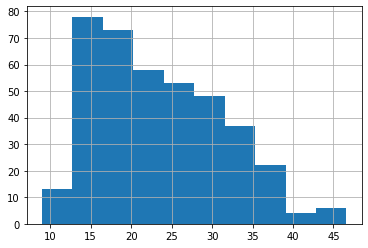

In [64]:
#Histograma 

## y = número de autos que gastan ese número de millas por galon
## x = número de millas por galon gastadas por un auto
autos['Millas_Por_Galon'].hist()
#Inclinada a la izquierda

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


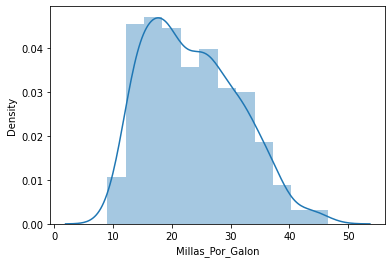

In [65]:
#Histograma con curva
sb.distplot(autos['Millas_Por_Galon'])

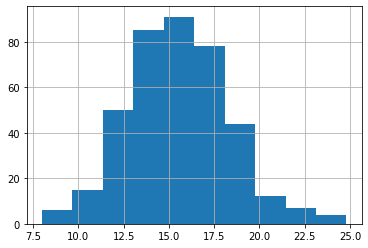

In [66]:
#Histograma 


## y = número de autos que tienen esa aceleración
## x = Aceleracion de un carro
autos['Aceleracion'].hist()


#Tiene forma de campana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


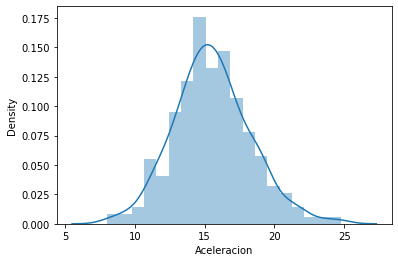

In [67]:
#Histograma con curva
sb.distplot(autos['Aceleracion'])

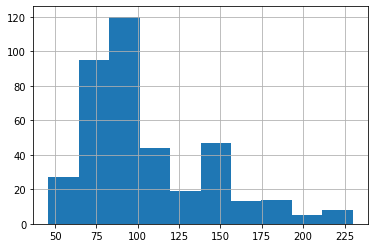

In [68]:
#Histograma 


## y = número de autos que tienen esos caballos de fuerza
## x = Caballos de fuerza de un carro
autos['Caballo_De_Fuerza'].hist()

#Tiene forma inclinada a la izq, la mayoría de los datos caen entre 75 y 100

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


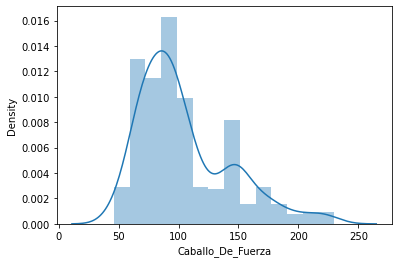

In [69]:
#Histograma con curva
sb.distplot(autos['Caballo_De_Fuerza'])

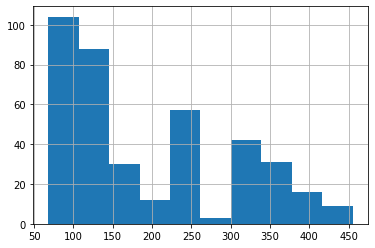

In [70]:
#Histograma


## y = número de autos con cierto Desplazamiento
## x = Desplazamiento de un carro
autos['Desplazamiento'].hist()

#anormal no es una distribuccion gausina o de campana

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


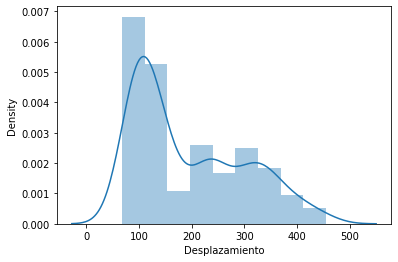

In [71]:
#Histograma con curva
sb.distplot(autos['Desplazamiento'])

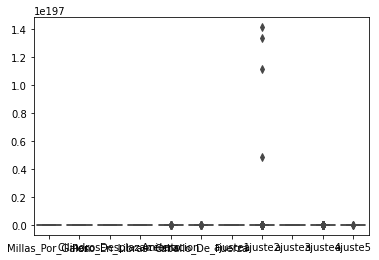

In [72]:
#BOXPLOT

#Abajo vemos cómo con Boxplot (o diagrama de cajas) podemos observar los valores atípicos rápidamente. 
sb.boxplot(data=autos)

#En las últimas dos variables hay algunos datos que salen de las cajas

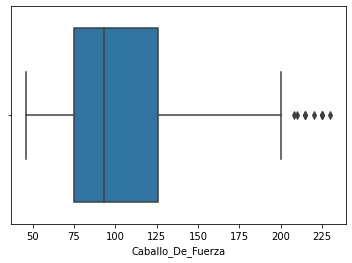

In [73]:
sb.boxplot(x = autos['Caballo_De_Fuerza'])
#No vale la pena cortar los outliers porque no se alejan tanto del 3er cuartil, por lo que podría ser una medición verdadera

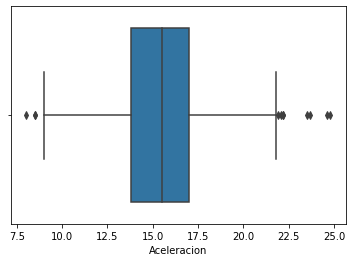

In [74]:
sb.boxplot(x = autos['Aceleracion'])
#No vale la pena cortar los outliers porque no se alejan tanto del 3er cuartil, por lo que podría ser una medición verdadera

In [75]:
#En dado caso de que cortáramos los outliers se haría de esta manera

#corte_inferior = 200 #valor asignado
#corte_superior = df['Variable'].quantile(0.75)
#df = df[(df['Variable'] < corte_superior) & (df['Variable'] > corte_inferior)]

#Pero no correré estas líneas, las dejaré escritas para futuras referencias
#Habrá que visualizar nuevamente las variables para ver como se comportan después de retirar los outliers

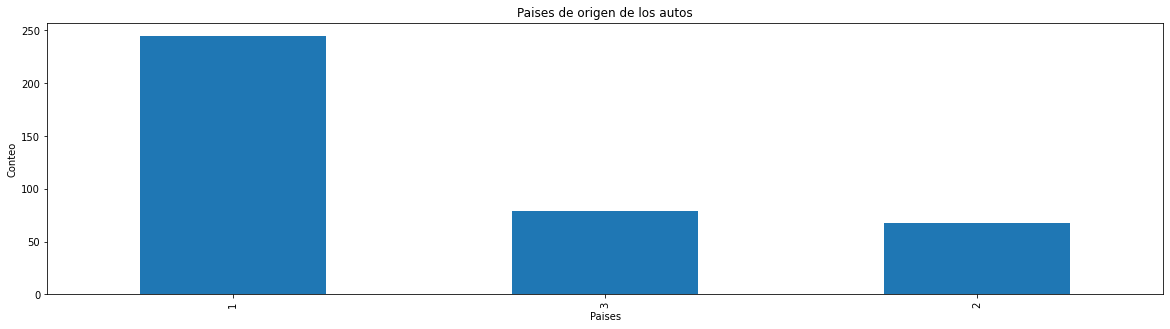

In [76]:
#Visualización de las variables No numéricas
autos['Pais_Origen'].value_counts().plot(kind='bar', figsize=(20,5))
plt.title('Paises de origen de los autos')
plt.ylabel('Conteo')
plt.xlabel('Paises');

(Text(0.5, 0, 'Autos'),)

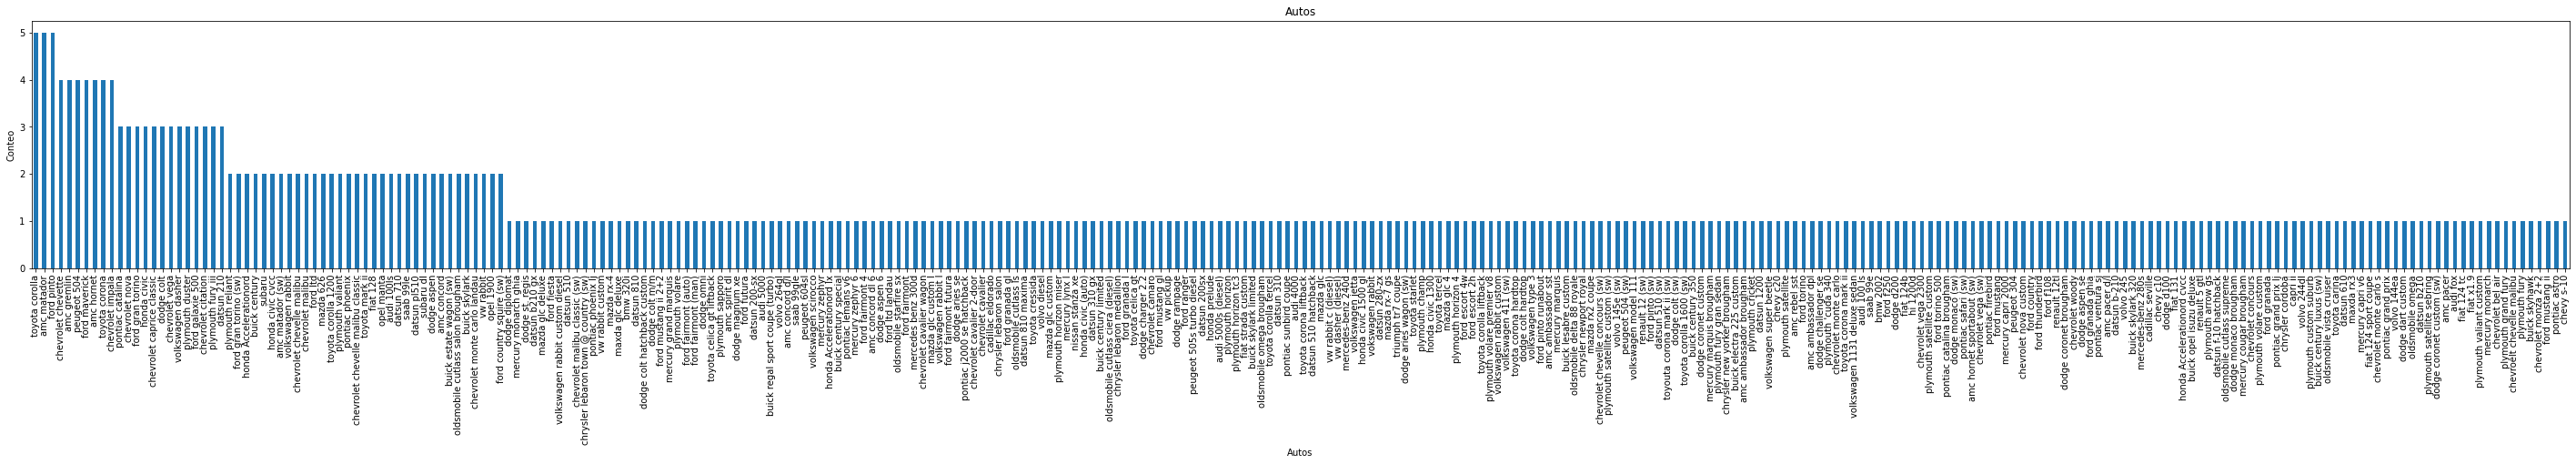

In [77]:
#Visualización de las variables No numéricas
autos['Nombre'].value_counts().plot(kind='bar', figsize=(50,5))
plt.title('Autos')
plt.ylabel('Conteo')
plt.xlabel('Autos'),

#Vemos que cada usuario escribió el nombre que quiso al momento de registrar el nombre de sus vehículos, 
#por lo que no vale la pena tomar esta variable por el momento para hacer mediciones, ya que hay datos distintos para cada registro

,Millas_Por_Galon,Cilindros,Peso_En_Libras,Desplazamiento,Aceleracion,Caballo_De_Fuerza,ajuste1,ajuste2,ajuste3,ajuste4,ajuste5
Millas_Por_Galon,1.000000,-0.777618,-0.832244,-0.805127,0.423329,-0.778427,-0.719321,-0.0,NaN,-0.026611,0.948786
Cilindros,-0.777618,1.000000,0.897527,0.950823,-0.504683,0.842983,0.894421,0.0,NaN,0.035870,-0.661388
Peso_En_Libras,-0.832244,0.897527,1.000000,0.932994,-0.416839,0.864538,0.775796,0.0,NaN,0.020118,-0.741013
Desplazamiento,-0.805127,0.950823,0.932994,1.000000,-0.543800,0.897257,0.928447,0.0,NaN,0.042466,-0.682681
Aceleracion,0.423329,-0.504683,-0.416839,-0.543800,1.000000,-0.689196,-0.535759,-0.0,NaN,-0.075594,0.162430
Caballo_De_Fuerza,-0.778427,0.842983,0.864538,0.897257,-0.689196,1.000000,0.767028,0.0,NaN,0.033836,-0.619505
ajuste1,-0.719321,0.894421,0.775796,0.928447,-0.535759,0.767028,1.000000,0.0,NaN,0.047819,-0.594884
ajuste2,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,NaN,NaN,0.000000,-0.000000
ajuste3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ajuste4,-0.026611,0.035870,0.020118,0.042466,-0.075594,0.033836,0.047819,0.0,NaN,1.000000,-0.025104


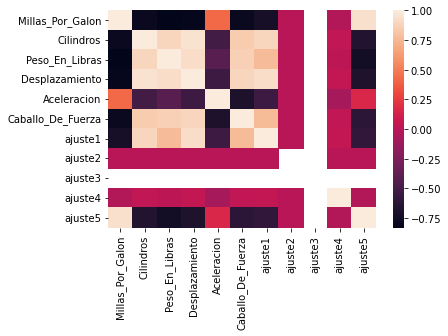

In [78]:
#Correlaciones y mapa de calor
correlaciones= autos.corr()
sb.heatmap(correlaciones)
correlaciones

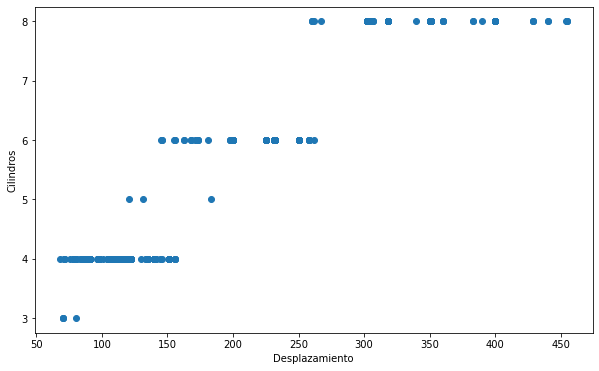

In [79]:
#Gráficos de dispersión

#Escogemos dos variables que hayan tenido una alta correlación
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(autos['Desplazamiento'], autos['Cilindros'])
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Cilindros')
plt.show()

#Alta Correlación, sigue un patrón 

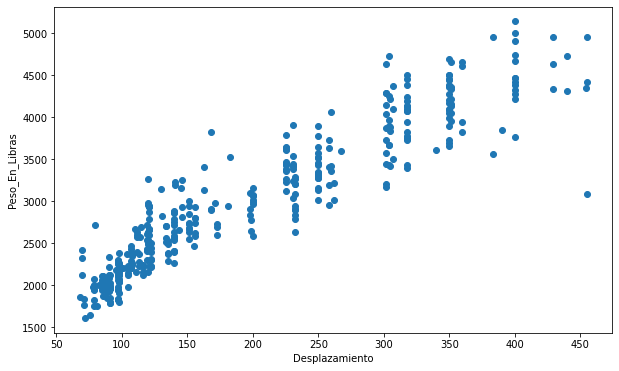

In [80]:
#Gráficos de dispersión

#Escogemos dos variables que hayan tenido una alta correlación
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(autos['Desplazamiento'], autos['Peso_En_Libras'])
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Peso_En_Libras')
plt.show()

#Alta Correlación, sigue una tendencia

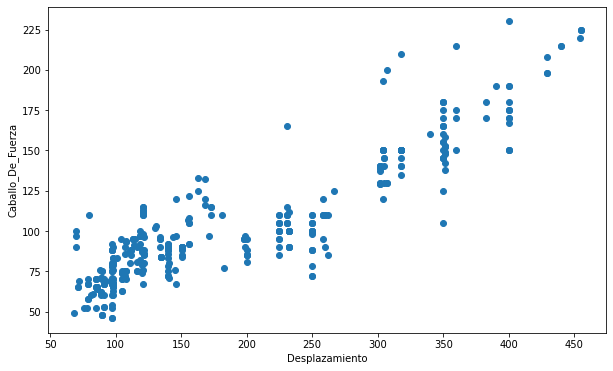

In [81]:
#Gráficos de dispersión

#Escogemos dos variables que hayan tenido una alta correlación
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(autos['Desplazamiento'], autos['Caballo_De_Fuerza'])
ax.set_xlabel('Desplazamiento')
ax.set_ylabel('Caballo_De_Fuerza')
plt.show()

#Alta Correlación, sigue una tendencia

Hay mucho más cosas para hacer para mostrar más análisis de datos, pero por ahora esto consideramos que representa una muy buena introducción que brinda un panorama bastante amplio sobre la disciplina.




In [38]:
#VIDEO DE YOUTUBE https://youtu.be/VIbz9BWixYk 